In [2]:
import nengo
from nengo import spa

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline

D = 32
rng = np.random.RandomState(0)
vocab = spa.Vocabulary(D, unitary=["ONE"], rng=rng)
number_dict = {"ONE":1, "TWO":2, "THREE":3, "FOUR":4, "FIVE":5,
               "SIX":6, "SEVEN":7, "EIGHT":8, "NINE":9}
number_ordered = OrderedDict(sorted(number_dict.items(), key=lambda t: t[1]))

number_range = 4
number_list = number_ordered.keys()
for i in range(number_range):
    print(number_list[i])
    vocab.add(number_list[i+1], vocab.parse("%s*ONE" % number_list[i]))

ONE
TWO
THREE
FOUR


In [10]:
af = np.load("data/learn_fig_data.npz")

In [11]:
t = af["t"]
keys = af["p_keys"]
values = af["p_values"]
learning = af["p_learning"]
error = af["p_error"]
recall = af["p_recall"]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

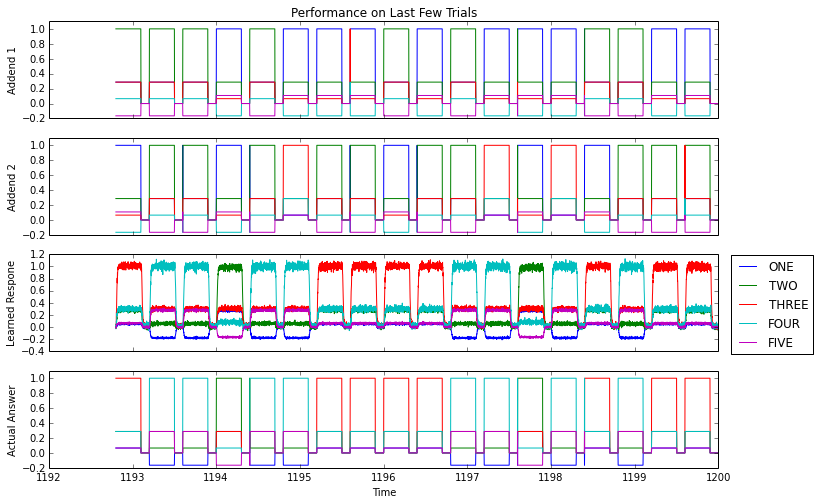

In [55]:
fig = plt.figure(figsize=(12,8))

win = -400*18

p_key1 = fig.add_subplot(4,1,1)
p_key1.plot(t[win:], spa.similarity(keys[win:, D:], vocab))
p_key1.set_ylim((-0.2, 1.1))
p_key1.set_ylabel("Addend 1")
p_key1.get_xaxis().get_major_formatter().set_useOffset(False)
p_key1.set_title("Performance on Last Few Trials")

p_key2 = fig.add_subplot(4,1,2)
p_key2.plot(t[win:], spa.similarity(keys[win:, :D], vocab))
p_key2.set_ylim((-0.2, 1.1))
p_key2.set_ylabel("Addend 2")
p_key2.get_xaxis().get_major_formatter().set_useOffset(False)

p1 = fig.add_subplot(4,1,3)
p1.plot(t[win:], spa.similarity(recall[win:,:], vocab))
p1.legend(vocab.keys, bbox_to_anchor=(1.15, 1.05))
p1.set_ylabel("Learned Respone")
p1.get_xaxis().get_major_formatter().set_useOffset(False)

p2 = fig.add_subplot(4,1,4)
p2.plot(t[win:], spa.similarity(values[win:,:], vocab))
p2.set_ylim((-0.2, 1.1))
p2.set_ylabel("Actual Answer")
p2.set_xlabel("Time (s)")
p2.get_xaxis().get_major_formatter().set_useOffset(False)

plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

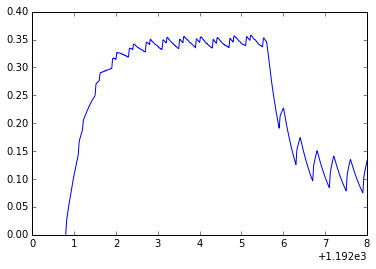

In [45]:
from nengo.synapses import filt
plt.plot(t[win:], filt(np.linalg.norm(error[win:,:], axis=1), 0.5, dt=0.001))

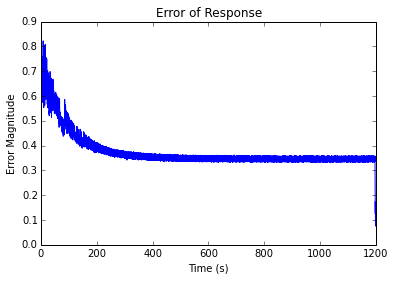

In [50]:
plt.plot(t, filt(np.linalg.norm(error, axis=1), 0.5, dt=0.001))
plt.ylabel("Error Magnitude")
plt.xlabel("Time (s)")
plt.title("Error of Response")

In [13]:
import nengo
from nengo import spa
from nengo.synapses import filt

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline

D = 32
rng = np.random.RandomState(0)
vocab = spa.Vocabulary(D, unitary=["ONE"], rng=rng)
number_dict = {"ONE":1, "TWO":2, "THREE":3, "FOUR":4, "FIVE":5,
               "SIX":6, "SEVEN":7, "EIGHT":8, "NINE":9}
number_ordered = OrderedDict(sorted(number_dict.items(), key=lambda t: t[1]))

number_range = 4
number_list = number_ordered.keys()
for i in range(number_range):
    print(number_list[i])
    vocab.parse(number_list[i])

ONE
TWO
THREE
FOUR


In [8]:
ad = np.load("data/no_unitary_learn_fig_data.npz")

In [9]:
t = ad["t"]
keys = ad["p_keys"]
values = ad["p_values"]
learning = ad["p_learning"]
non_error = ad["p_error"]
recall = ad["p_recall"]

KeyError: 't is not a file in the archive'

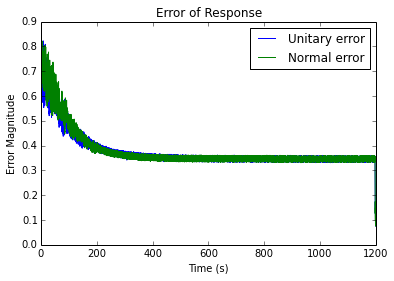

In [12]:
plt.plot(t, filt(np.linalg.norm(error, axis=1), 0.5, dt=0.001))
plt.plot(t, filt(np.linalg.norm(non_error, axis=1), 0.5, dt=0.001))
plt.legend(["Unitary error", "Normal error"])
plt.ylabel("Error Magnitude")
plt.xlabel("Time (s)")
plt.title("Error of Response")

In [5]:
ac = np.load("data/ens_learn_data.npz")

In [6]:
ens_error = ac["p_error"]

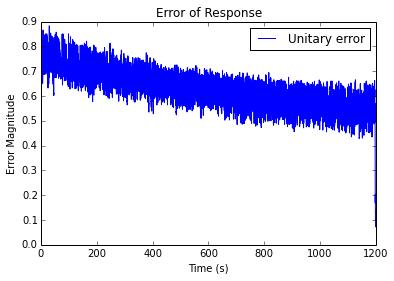

In [14]:
plt.plot(t, filt(np.linalg.norm(ens_error, axis=1), 0.5, dt=0.001))
plt.legend(["Unitary error", "Normal error"])
plt.ylabel("Error Magnitude")
plt.xlabel("Time (s)")
plt.title("Error of Response")

In [14]:
import nengo
from nengo import spa
from nengo.synapses import filt

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline

D = 10
rng = np.random.RandomState(0)
vocab = spa.Vocabulary(D, rng=rng)
number_dict = {"ONE":1, "TWO":2, "THREE":3, "FOUR":4, "FIVE":5,
               "SIX":6, "SEVEN":7, "EIGHT":8, "NINE":9}
number_ordered = OrderedDict(sorted(number_dict.items(), key=lambda t: t[1]))
# This should be set to 10 for the actual final test
number_range = 4
number_list = number_ordered.keys()

def nearest(d):
    from scipy.linalg import sqrtm
    p = nengo.dists.UniformHypersphere(surface=True).sample(d, d)
    return np.dot(p, np.linalg.inv(sqrtm(np.dot(p.T, p))))
orth_vecs = nearest(D)

for i in range(number_range):
    print(number_list[i])
    vocab.add(number_list[i], orth_vecs[i])

ONE
TWO
THREE
FOUR


In [15]:
af = np.load("data/het_learning_data.npz")
t_val = np.load("data/het_time.npz")

In [16]:
t = t_val["t"]
keys = af["p_keys"]
learning = af["p_learning"]
error = af["p_error"]
recall = af["p_recall"]

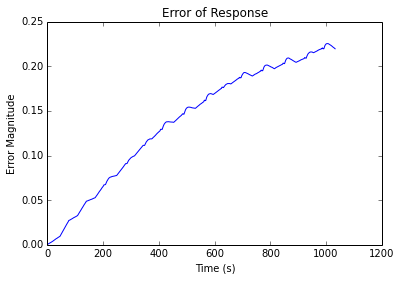

In [17]:
plt.plot(filt(np.linalg.norm(error, axis=1), 0.5, dt=0.001))
plt.ylabel("Error Magnitude")
plt.xlabel("Time (s)")
plt.title("Error of Response")

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

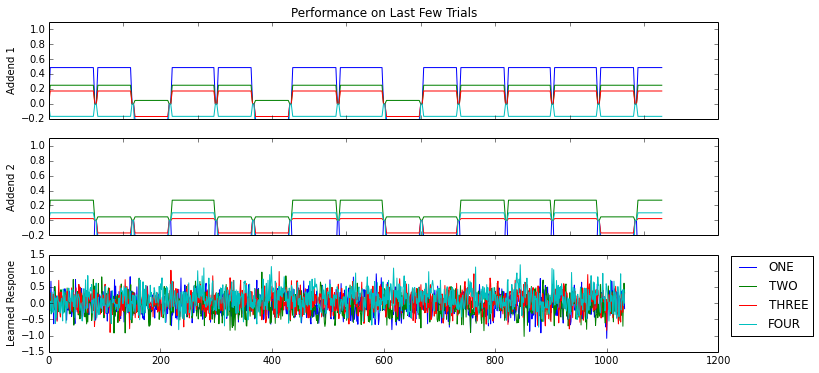

In [19]:
fig = plt.figure(figsize=(12,8))

win = -400*18

p_key1 = fig.add_subplot(4,1,1)
p_key1.plot(spa.similarity(keys[:, D:], vocab))
p_key1.set_ylim((-0.2, 1.1))
p_key1.set_ylabel("Addend 1")
p_key1.get_xaxis().get_major_formatter().set_useOffset(False)
p_key1.set_title("Performance on Last Few Trials")

p_key2 = fig.add_subplot(4,1,2)
p_key2.plot(spa.similarity(keys[:, :D], vocab))
p_key2.set_ylim((-0.2, 1.1))
p_key2.set_ylabel("Addend 2")
p_key2.get_xaxis().get_major_formatter().set_useOffset(False)

p1 = fig.add_subplot(4,1,3)
p1.plot(spa.similarity(recall, vocab))
p1.legend(vocab.keys, bbox_to_anchor=(1.15, 1.05))
p1.set_ylabel("Learned Respone")
p1.get_xaxis().get_major_formatter().set_useOffset(False)

plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)